# MKI Code: Mpld3 tutorial

## D3 
- [D3](http://d3js.org/) "Data-Driven Documents" is a a JavaScript library for manipulating documents based on data. D3 will help you create a webpage with HTML, SVG and CSS nessecary to render data, graphs and plots with smooth transition and interaction. 

## mpld3
- Mpld3 is another step above d3. By using matplotlib as a backend for plotting in python, mpld3 helps you create a d3-like code to generate interactive plot with only few extra lines of code in python. It can also be used with IPython notebook to create an interactive plot while you are working in the notebook.

<b>note:</b> D3 (and also mpld3) is meant to be a tool to create a final plot to be presented in the website or in the presentation. It is <u>not</u> meant to be an interactive tool for data exploration. [Glue](http://www.glueviz.org/en/stable/) is an example of a tool for exploring relationship within and among related datasets. 

<b>Install mpld3</b> <br>


In [ ]:
pip install mpld3

## Quick Start Guide

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3

%matplotlib inline

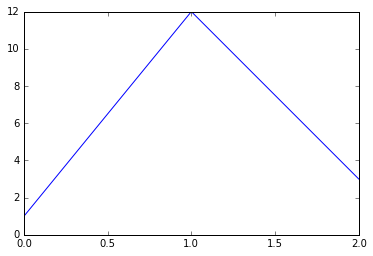

In [72]:
plt.plot([1,12,3])

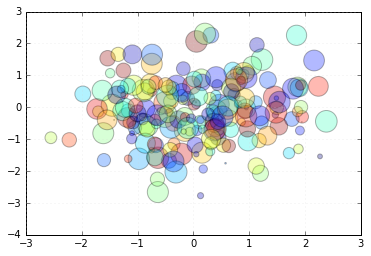

In [71]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

In [73]:
mpld3.display(fig)

If you'd like to use mpld3 by default for every figure you generate, you can call the following command:

In [74]:
mpld3.enable_notebook()

## Other types of plot
### Histogram

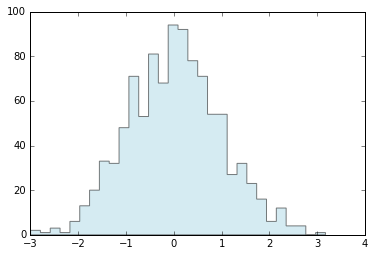

In [75]:
# Histogram with modified axes/grid
fig, ax = plt.subplots()
x = np.random.normal(size=1000)

ax.hist(x, 30, histtype='stepfilled', fc='lightblue', alpha=0.5);

### Line Plots with Legend

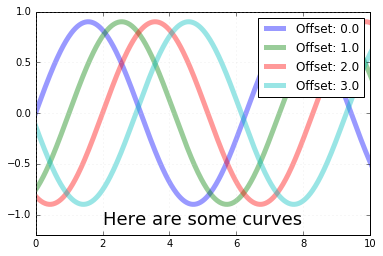

In [76]:
# Draw lines
fig, ax = plt.subplots()
x = np.linspace(-5, 15, 1000)
for offset in np.linspace(0, 3, 4):
    ax.plot(x, 0.9 * np.sin(x - offset), lw=5, alpha=0.4,
            label="Offset: {0}".format(offset))
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.0)
ax.text(5, -1.1, "Here are some curves", size=18, ha='center')
ax.grid(color='lightgray', alpha=0.7)
ax.legend()

### Multiple Subplots with linked axes¶

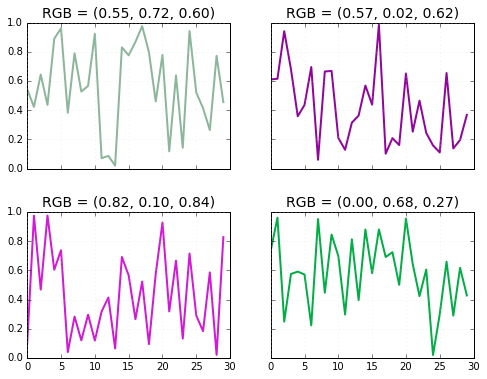

In [78]:
# multiple subplots, shared axes
fig, ax = plt.subplots(2, 2, figsize=(8, 6),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.3)

np.random.seed(0)

for axi in ax.flat:
    color = np.random.random(3)
    axi.plot(np.random.random(30), lw=2, c=color)
    axi.set_title("RGB = ({0:.2f}, {1:.2f}, {2:.2f})".format(*color),
                  size=14)
    axi.grid(color='lightgray', alpha=0.7)

In [29]:
mpld3.disable_notebook()

## Output the file to html

In [79]:
x=mpld3.fig_to_html(fig,no_extras=False, template_type='general', figid=None, use_http=False)

In [80]:
text_file = open("mki_test.html", "w")
text_file.write("%s" % x)
text_file.close()

## Plugins in mpld3

One of the most interesting features of mpld3 is the ability to add plugins to your plots. Plugins are objects which define new, interactive functionality for your visualizations. There are several built-in to the mpld3 package. Examples below come from [mpld3 website](http://mpld3.github.io/examples/index.html#example-gallery).

### Scatter Plot With Tooltips

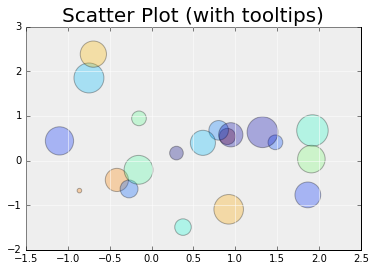

In [67]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 20

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips)", size=20)

#define what do we want to be label
labels = ['point {0}'.format(i + 1) for i in range(N)]

#create a new plugin that implement at label
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

### Linked Brushing Example

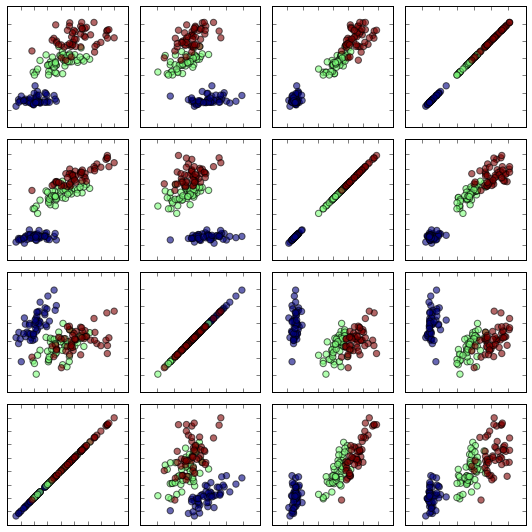

In [68]:
#from mpld3 import utils
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

# remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

# connect the linked brush plugin
mpld3.plugins.connect(fig, mpld3.plugins.LinkedBrush(points))

### Line Highlight Example (and multiple plugins)

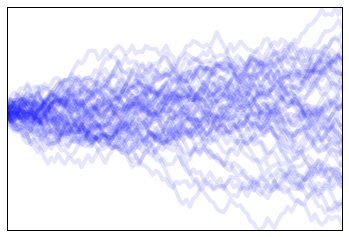

In [81]:
class HighlightLines(mpld3.plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """
    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [mpld3.utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}


N_paths = 50
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)

# make a plot and draw lines
fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []})
lines = ax.plot(x, y.T, color='blue', lw=4, alpha=0.1)

# connect the linked brush plugin
mpld3.plugins.connect(fig, HighlightLines(lines))    

for i in range(N_paths):
    tooltip = mpld3.plugins.LineLabelTooltip(ax.get_lines()[i], 'Path: '+str(i))
    mpld3.plugins.connect(fig, tooltip) 

## Defining a Custom Plugin
This requires a familiarity with both Python and Javascript.

## Wrap up
- you can find all the information about this package and all the tutorial at http://mpld3.github.io/